In [2]:
import numpy as np
# import kmeans_functions as km
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [3]:
best = ()
best = (0,2)
k, d = best
print(k)
print(d)

0
2


In [10]:
def find_clusters(X, n_clusters, rseed=10, n_init=30):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    j = 0
    while j <= n_init:
        # 2a. Assign labels based on closest center
        labels = km.assignment(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = km.computation(X, labels, n_clusters)
        
        plot_data(X, labels, centers, '%d assignment'%(j))
        plot_data(X, labels, new_centers, '%d computation'%(j))
            
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        j += 1
    return centers, labels

In [11]:
def plot_data(X, labels, centers, title):
    plt.figure(figsize=(7,7))
    plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    plt.title(title);

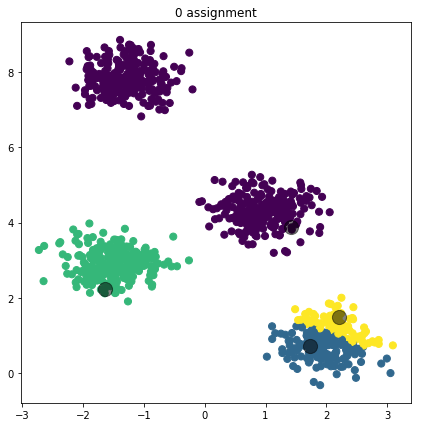

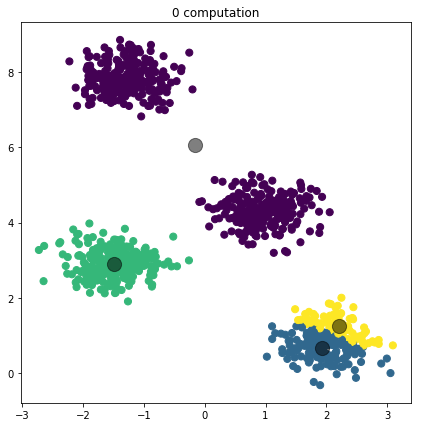

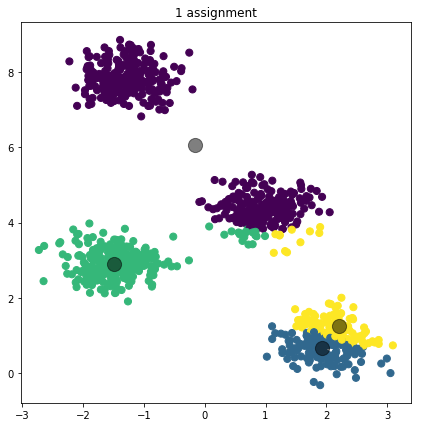

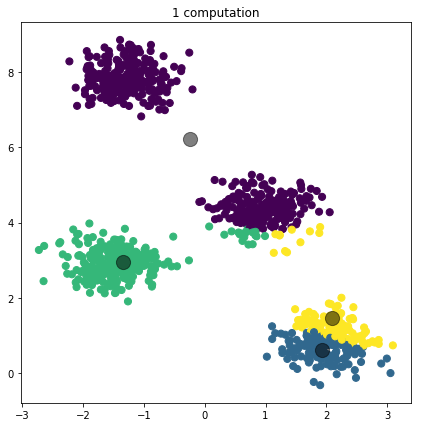

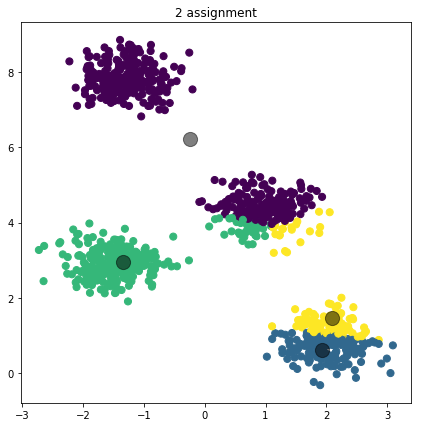

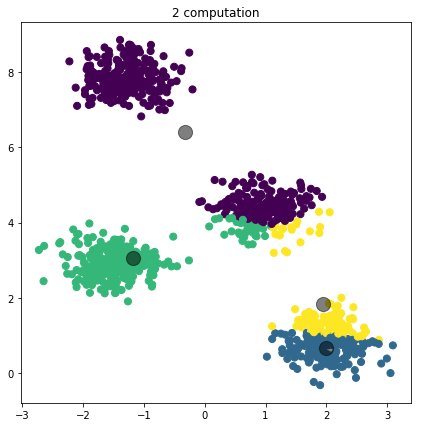

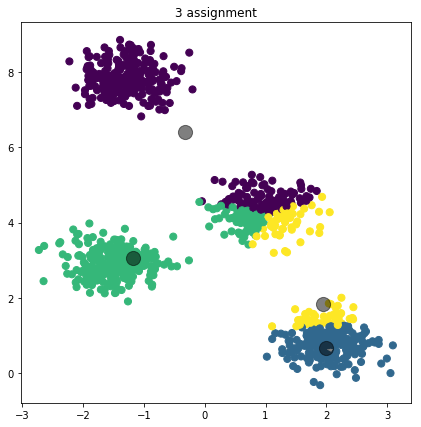

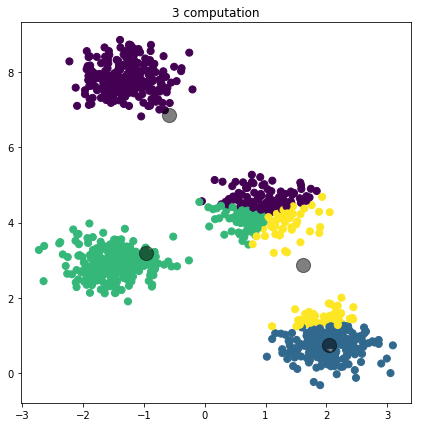

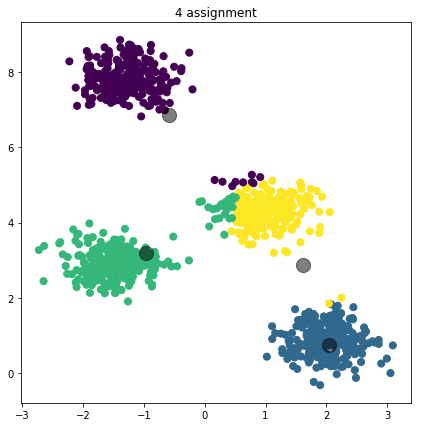

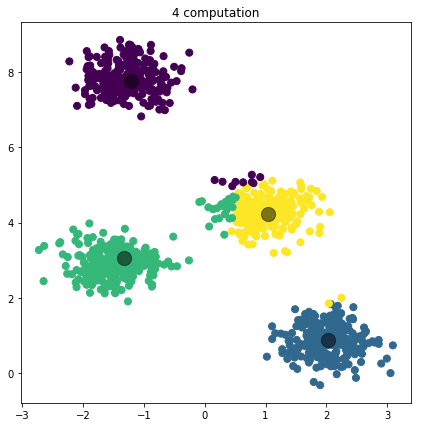

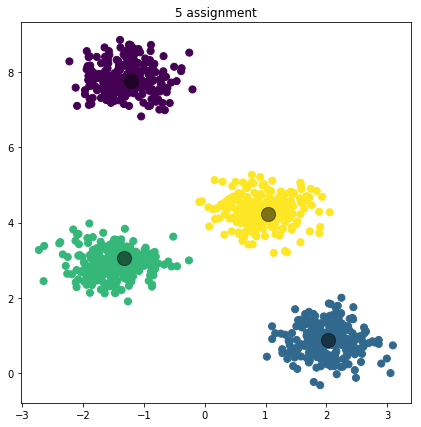

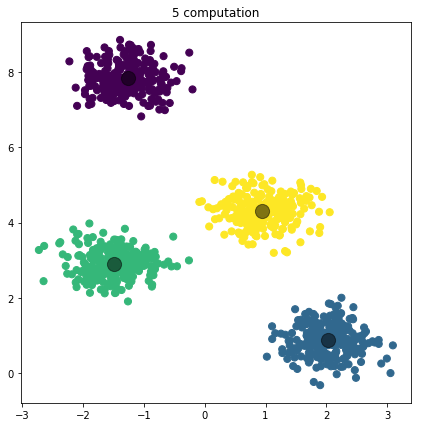

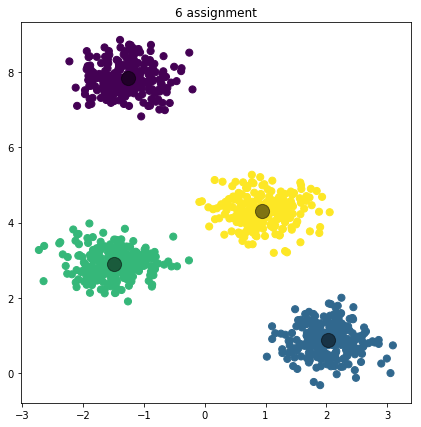

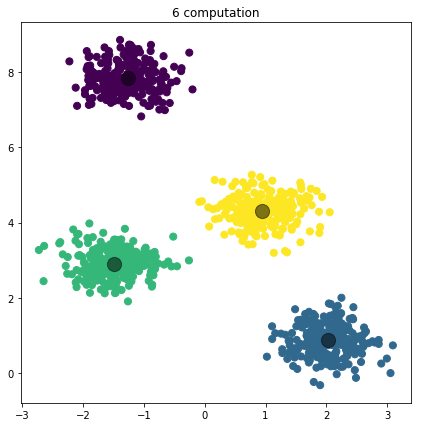

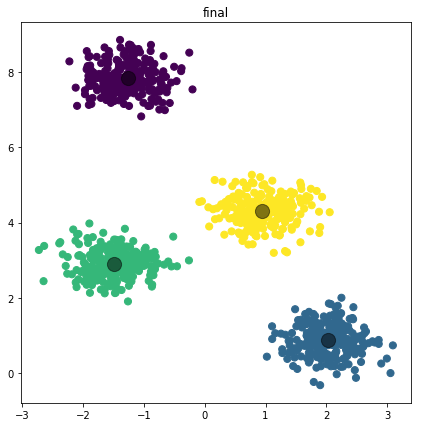

In [12]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=.40, random_state=0)
centers, labels = find_clusters(X, 4, 2)
plot_data(X, labels, centers, 'final')

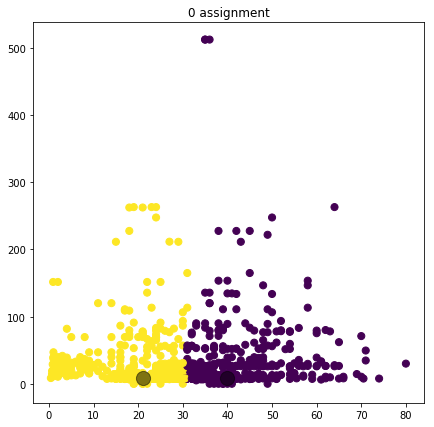

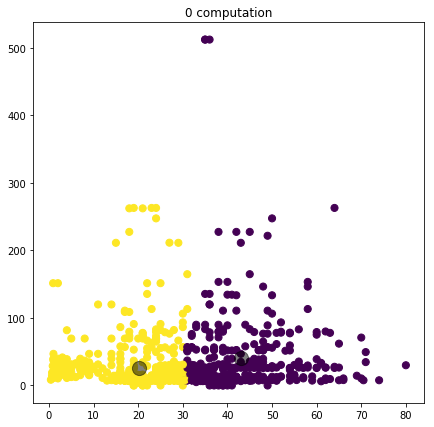

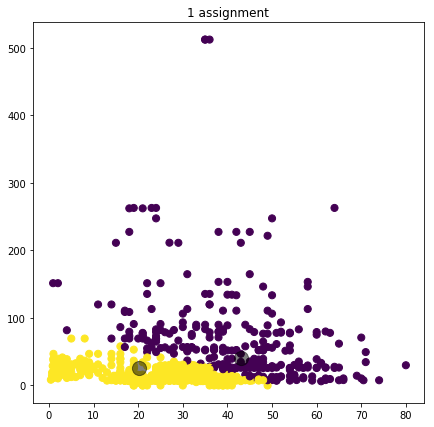

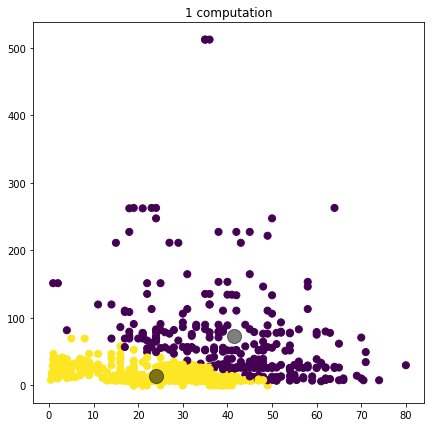

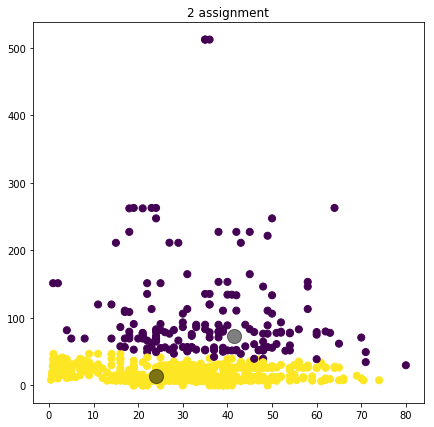

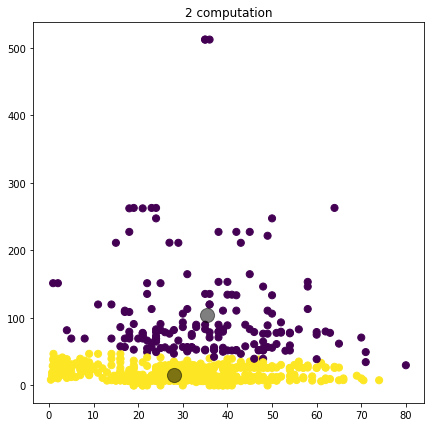

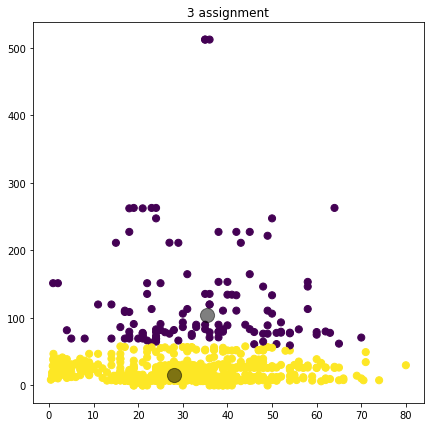

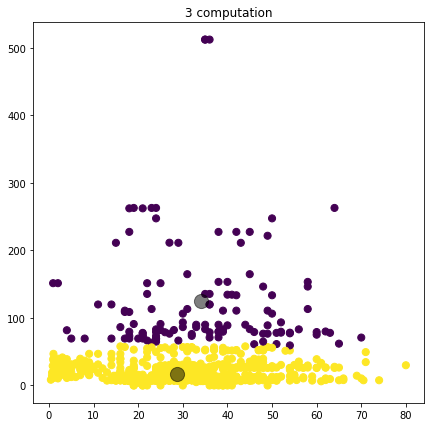

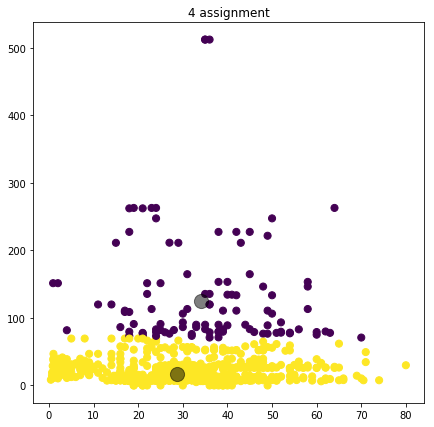

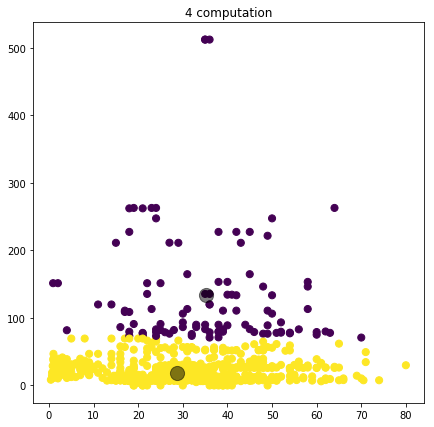

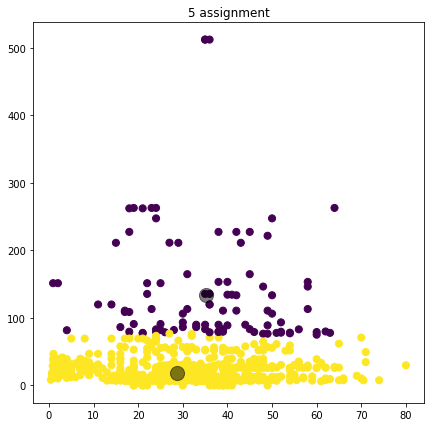

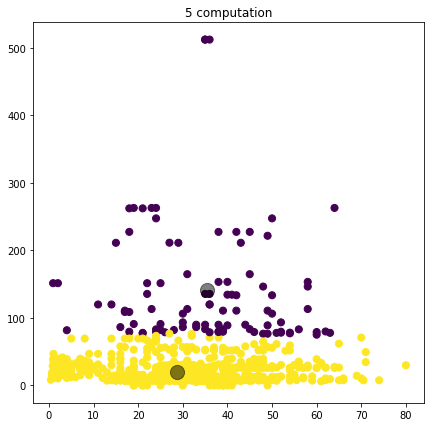

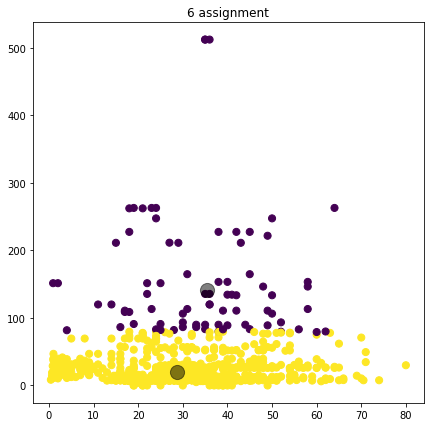

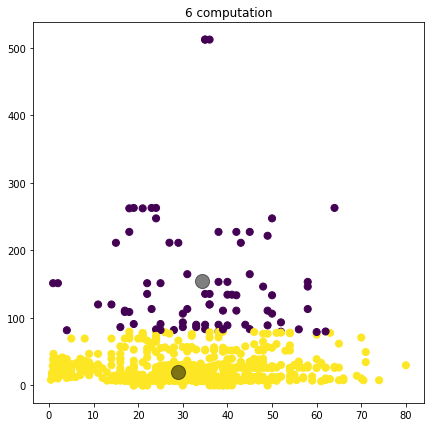

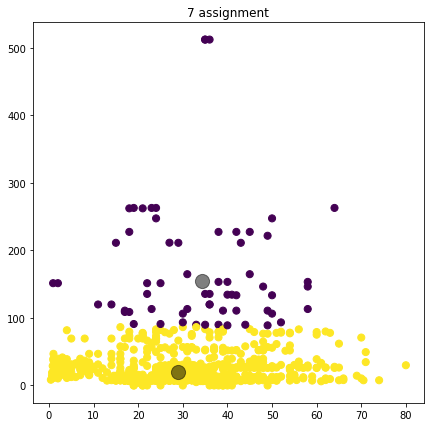

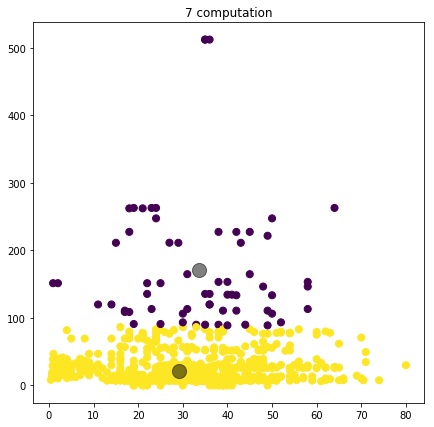

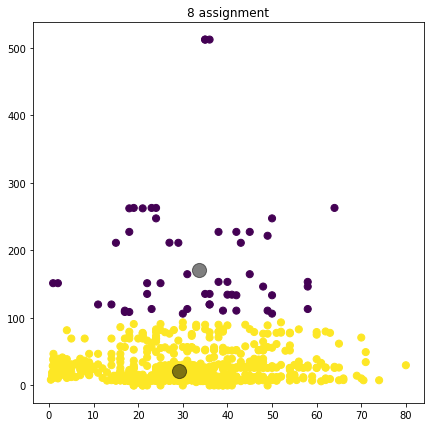

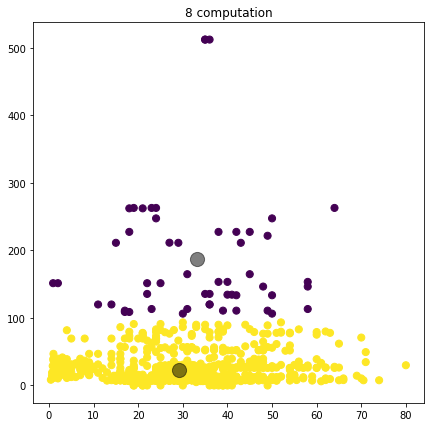

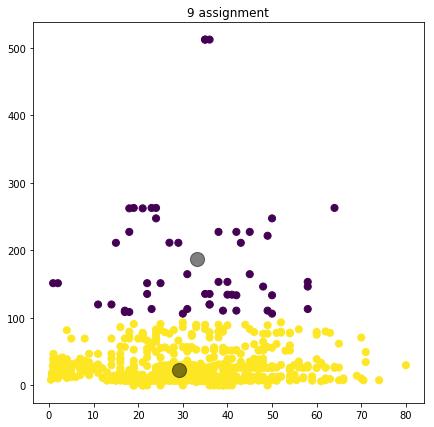

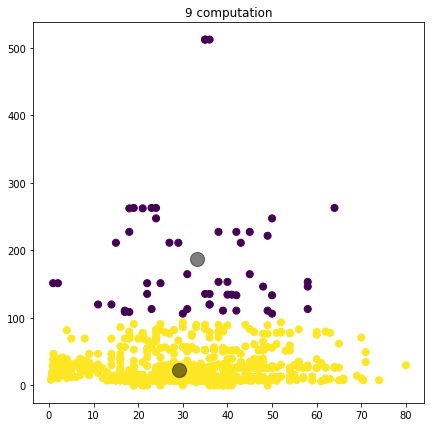

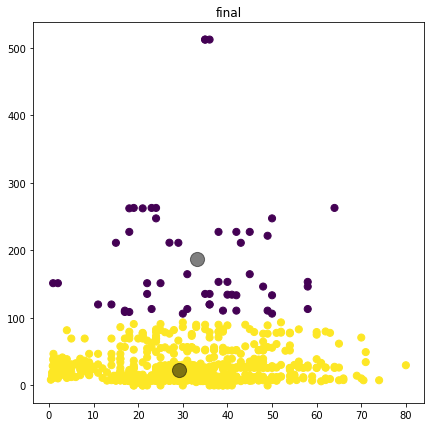

In [13]:
### let's look a real data
import pandas as pd
df_titanic = pd.read_csv('titanic.csv')
df_titanic = df_titanic[['Age','Fare']]
df_titanic.dropna(inplace=True)
centers, labels = find_clusters(df_titanic.values, 2, 2)
plot_data(df_titanic.values, labels, centers, 'final')